# Social Media Analytics - Group Project 

###### Group 5: Salma BARKETALLAH, Ndjaidoukmi KEDA, Noémie GAUTIER

Company: Google

                            In this notebook, tweets from the official google account will be analyzed 

In [1]:
options(warnings = -1)

###  Loading the required packages 

In [1]:
# Install rtweet package:
if(!require("rtweet")) install.packages("rtweet", quiet=TRUE); library("rtweet", quiet=TRUE)
# Install Other packages:
for (i in c('topicmodels','ggplot2','readr','SnowballC','slam','tm','Matrix','tidytext','dplyr','hunspell','purrr','wordcloud','RWeka')){
  if (!require(i, character.only=TRUE)) install.packages(i, repos = "http://cran.us.r-project.org", quiet=TRUE)
  require(i, character.only=TRUE, quiet=TRUE)
}
library(tidyverse, quiet=TRUE)


Loading required package: rtweet



Loading required package: topicmodels



Loading required package: ggplot2



Loading required package: readr



Loading required package: SnowballC



Loading required package: slam



Loading required package: tm



Loading required package: NLP




Attaching package: ‘NLP’




The following object is masked from ‘package:ggplot2’:

    annotate




Loading required package: Matrix



Loading required package: tidytext



Loading required package: dplyr




Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Loading required package: hunspell



Loading required package: purrr




Attaching package: ‘purrr’




The following object is masked from ‘package:rtweet’:

    flatten




Loading required package: wordcloud



Loading required package: RColorBrewer



Loading required package: RWeka



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──



✔ tibble  3.0.6     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.1



── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ NLP::annotate()  masks ggplot2::annotate()
✖ tidyr::expand()  masks Matrix::expand()
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks rtweet::flatten()
✖ dplyr::lag()     masks stats::lag()
✖ tidyr::pack()    masks Matrix::pack()
✖ tidyr::unpack()  masks Matrix::unpack()



#### Loading the CSV file:

In [2]:
google_timeline <- read_csv("google_timeline.csv", col_types = cols(.default = "c")) #recent tweets

#### Data pre-processing

In [3]:
nrow(google_timeline)

[1] 3200

In [4]:
# View tweets from Google:
head(google_timeline, n=2)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
x20536157,x1352856480773525505,2021-01-23 05:51:34,Google,@perfectlyfaded1 Hi there. Let's see what we can do to help. Look out for a DM with next steps.,Conversocial,78,x1339730129300443137,x3293914951,perfectlyfaded1,⋯,126543,2979,2009-02-10 19:14:39,TRUE,https://t.co/jGyu5e8Pzx,http://google.com/yearinsearch,NA,https://pbs.twimg.com/profile_banners/20536157/1609170466,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1343584679664873479/Xos3xQfk_normal.jpg
x20536157,x1352854779614130176,2021-01-23 05:44:48,Google,@izthewizkid Got it. Let's see what we can do to help. Please follow us and let us know when you have so we can share next steps through DM.,Conversocial,127,x1339242585676804103,x26464325,izthewizkid,⋯,126543,2979,2009-02-10 19:14:39,TRUE,https://t.co/jGyu5e8Pzx,http://google.com/yearinsearch,NA,https://pbs.twimg.com/profile_banners/20536157/1609170466,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1343584679664873479/Xos3xQfk_normal.jpg


###### Remove Punctuation

In [10]:
#Remove punctiation
google_timeline_text <- mutate(google_timeline[, c("status_id","text")], text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))

###### Tokenization

In [11]:
google_timeline_tokenized <-google_timeline_text %>% unnest_tokens(output = "word", # how should the new column be named?
                                             input = text, # where can we find the text? 
                                             token = "words", # which tokenization scheme should we follow?
                                             drop=FALSE,to_lower=TRUE) # drop=FALSE specifies that we want to keep our text; to_lower = lowercase
nrow(google_timeline_tokenized)

[1] 81111

###### Remove Unwanted Symbols and Words

In [12]:
#Remove # and @
google_timeline_tokenized<- filter(google_timeline_tokenized, substr(word, 1, 1) != '#', 
                             substr(word, 1, 1) != '@') # This compares for the first letter of a token # omit hashtags
nrow(google_timeline_tokenized)

[1] 81111

###### Remove stopwords

In [14]:
#Remove Stop words:
google_timeline_tokenized<- google_timeline_tokenized %>% anti_join(get_stopwords()) # note that we continue with the 'uncorrected' words here
nrow(google_timeline_tokenized)

# this reduces the number of words by 30,000

Joining, by = "word"



[1] 51653

In [19]:
get_stopwords()

word,lexicon
<chr>,<chr>
i,snowball
me,snowball
my,snowball
myself,snowball
we,snowball
our,snowball
ours,snowball
ourselves,snowball
you,snowball


In [17]:
stopwords()

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

###### Stemming/Lemmatization

In [10]:
#Stemming:
google_timeline_stemming<- google_timeline_tokenized %>% mutate(word = wordStem(word)) 
 
# put a different name as not sure we want to use it

###### Document-term matrix

In [11]:
# Number of times a word occurred in each tweet
google_timeline_tokenized <- google_timeline_tokenized %>% count(status_id,word)
head(google_timeline_tokenized)

status_id,word,n
<chr>,<chr>,<int>
x1336456068671672320,can,2
x1336456068671672320,dm,1
x1336456068671672320,follow,1
x1336456068671672320,help,1
x1336456068671672320,hi,1
x1336456068671672320,know,1


###### Inspect the text

In [12]:
# investigate the most frequent terms
google_timeline_freq <- google_timeline_tokenized %>% group_by(word) %>%
                  summarize(freq = n()) %>%
                  arrange(-freq)
head(google_timeline_freq)

word,freq
<chr>,<int>
hi,2202
us,2173
help,2125
steps,1919
know,1591
can,1576


###### Removing https and t.co:

In [13]:
# create a tibble with unwanted words
tco <- tibble("word"= c("t.co", "https", "google", "heygoogle"))
tco

word
<chr>
t.co
https
google
heygoogle


In [14]:
google_timeline_tokenized <- google_timeline_tokenized %>%anti_join(tco)
head(google_timeline_tokenized)

Joining, by = "word"



status_id,word,n
<chr>,<chr>,<int>
x1336456068671672320,can,2
x1336456068671672320,dm,1
x1336456068671672320,follow,1
x1336456068671672320,help,1
x1336456068671672320,hi,1
x1336456068671672320,know,1


In [15]:
# remove unwanted words
google_timeline_freq <- google_timeline_freq  %>%anti_join(tco)
head(google_timeline_freq)

Joining, by = "word"



word,freq
<chr>,<int>
hi,2202
us,2173
help,2125
steps,1919
know,1591
can,1576


###### Making WorldClouds:

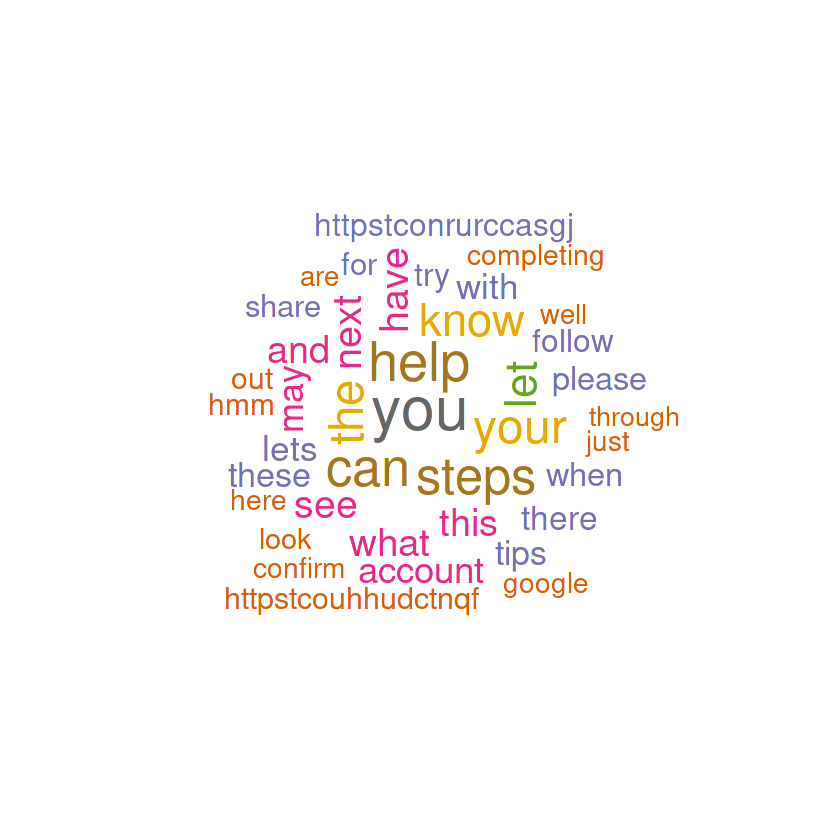

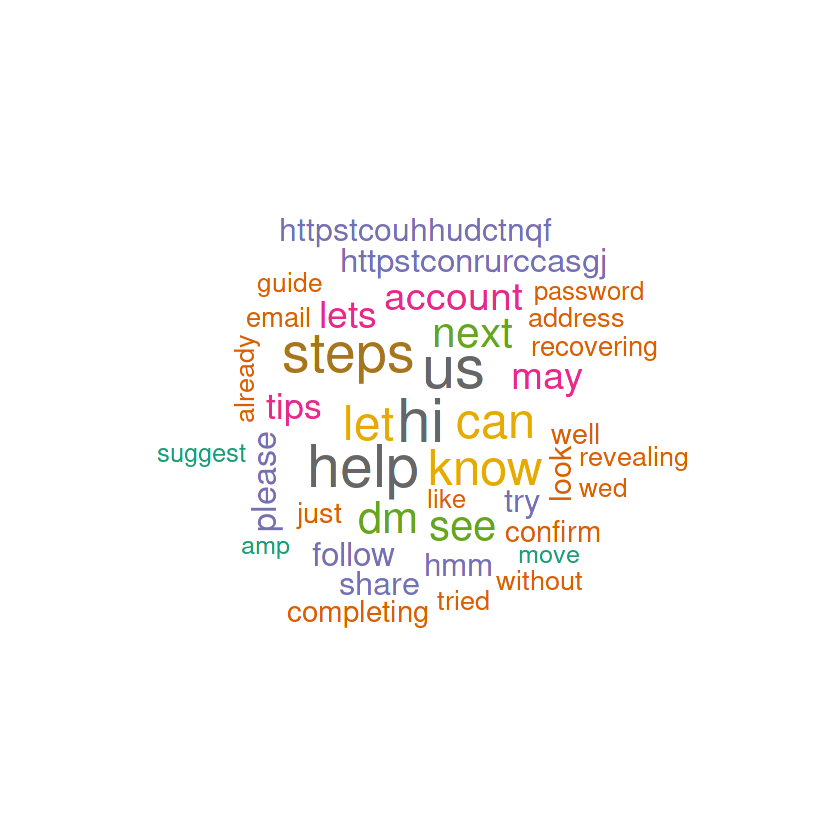

In [16]:
# Word cloud based on the original text with no preprocessing
tf <- termFreq(google_timeline_text$text)
wd1<- wordcloud(names(tf),tf,
          max.words=40,
          scale=c(3,1),
          random.order=FALSE,
          colors=brewer.pal(8, "Dark2"))
wd1

# Word cloud based on the pre-processing
wd1<- wordcloud(google_timeline_freq$word, google_timeline_freq$freq,
          max.words=40,
          scale=c(3,1),
          random.order=FALSE,
          colors=brewer.pal(8, "Dark2"))


Selecting by freq



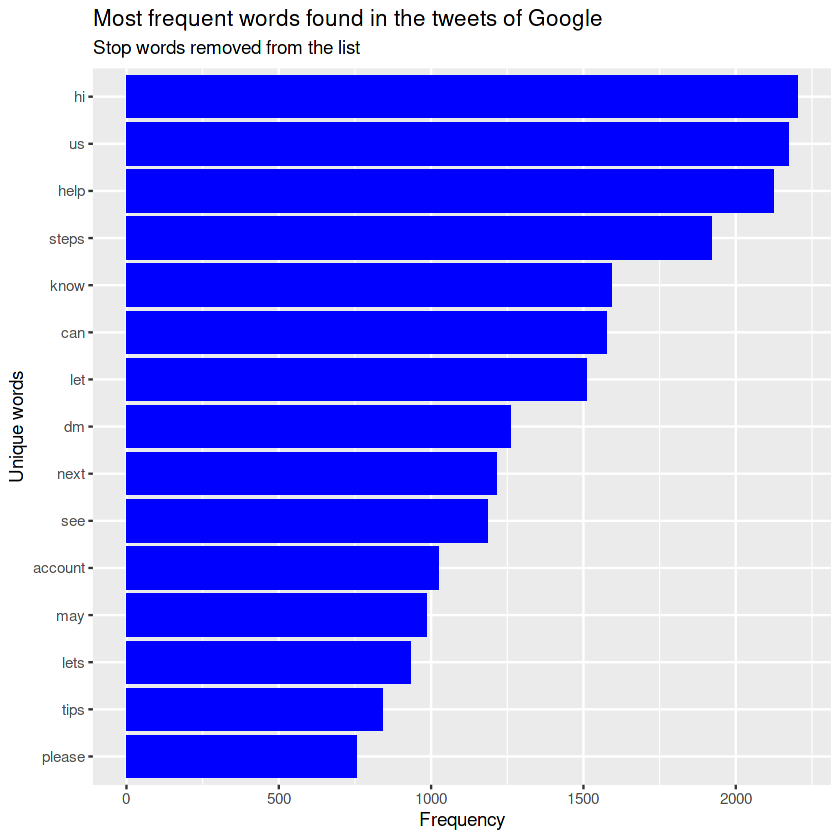

In [17]:
# bar chart of the most frequent words found in the tweets
google_timeline_freq %>% 
  top_n(15) %>%
  mutate(word = reorder(word, freq)) %>%
  ggplot(aes(x = word, y = freq)) +
  geom_col(fill="blue") +
  xlab(NULL) +
  coord_flip() +
  labs(y = "Frequency",
       x = "Unique words",
       title = "Most frequent words found in the tweets of Google",
       subtitle = "Stop words removed from the list")

In [18]:
# Creating the Document Term Matrix with integrated tfidf 
google_timeline_DTM <- google_timeline_tokenized %>% 
                        count(status_id,word , sort=TRUE) %>%
                        cast_dtm(document = status_id, term = word,
                        value = n, weighting = tm::weightTf)

In [19]:
# let's inspect this matrix's structure
str(google_timeline_DTM)

List of 6
 $ i       : int [1:49570] 1 2 3 4 5 6 7 8 12 17 ...
 $ j       : int [1:49570] 1 1 1 1 1 1 1 1 1 1 ...
 $ v       : num [1:49570] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 3200
 $ ncol    : int 4889
 $ dimnames:List of 2
  ..$ Docs : chr [1:3200] "x1336456068671672320" "x1336524420567986179" "x1336533336861372417" "x1336535534454386688" ...
  ..$ Terms: chr [1:4889] "can" "dm" "follow" "help" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [20]:
#associations/correlations between words (this is with the dtm):
findAssocs(google_timeline_DTM , terms = "google", corlimit = 0.10)

$google
numeric(0)

### Summary of Tweets From Google Account Timeline:

In [21]:
google_tweets_organic <- google_timeline[google_timeline$is_retweet==FALSE, ]

In [22]:
# Remove replies
google_tweets_organic <- subset(google_tweets_organic, is.na(google_tweets_organic$reply_to_status_id))
nrow(google_tweets_organic)

[1] 74

###### Best/ Worst Engagement:

In [48]:
#head(google_tweets_organic, n=2)

In [45]:
#colnames(google_tweets_organic)

In [23]:
# average number of likes per tweet
google_tweets_organic$favorite_count<-as.numeric(google_tweets_organic$favorite_count)
average<-as.integer(mean(google_tweets_organic$favorite_count))
average

[1] 669

In [24]:
# average number of retweet per tweet 
google_tweets_organic$retweet_count<-as.numeric(google_tweets_organic$retweet_count)
average<-as.integer(mean(google_tweets_organic$retweet_count))
average

[1] 137

In [25]:
#engagement analysis (tweets with highest favourite/like count)
google_tweets_organic <- google_tweets_organic%>%arrange(desc(favorite_count))
google_tweets_organic[1,1:6]

user_id,status_id,created_at,screen_name,text,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
x20536157,x1336672282769563651,2020-12-09 14:01:21,Google,"In times of uncertainty, people seek understanding and meaning. 2020 was a year of deep questioning, as the world searched ""why"" more than ever, according to Google Trends. Explore more trends from the year at https://t.co/JdD6lj4ru9 #YearInSearch https://t.co/wAfuARB3u9",Twitter Media Studio


In [26]:
#engagement analysis (tweets with highest retweets count)
google_tweets_organic <- google_tweets_organic %>% arrange(desc(retweet_count))
google_tweets_organic[1,1:6]

user_id,status_id,created_at,screen_name,text,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
x20536157,x1336672282769563651,2020-12-09 14:01:21,Google,"In times of uncertainty, people seek understanding and meaning. 2020 was a year of deep questioning, as the world searched ""why"" more than ever, according to Google Trends. Explore more trends from the year at https://t.co/JdD6lj4ru9 #YearInSearch https://t.co/wAfuARB3u9",Twitter Media Studio


###### Types of Tweets:

In [27]:
# Keeping only the retweets
google_retweets <- google_timeline[google_timeline$is_retweet==TRUE,]
nrow(google_retweets)

[1] 18

In [28]:
# Keeping only the replies
google_replies <- subset(google_timeline, !is.na(google_timeline$reply_to_status_id))
nrow(google_replies)

[1] 3108

In [29]:
# Creating a data frame base on the observations count for retweets, replies and organic tweets
data_google <- data.frame(
  category=c("Organic", "Retweets", "Replies"),
  count=c(74, 18, 3108)
)

data_google

category,count
<chr>,<dbl>
Organic,74
Retweets,18
Replies,3108


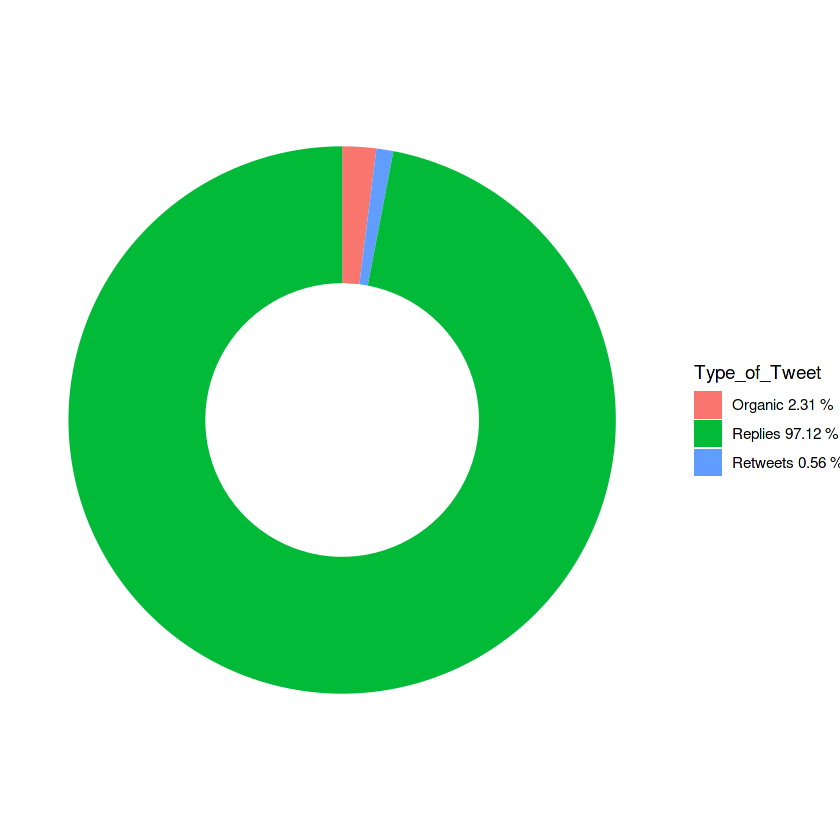

In [30]:
# Adding columns
data_google$fraction = data_google$count / sum(data_google$count)
data_google$percentage = data_google$count / sum(data_google$count) * 100
data_google$ymax = cumsum(data_google$fraction)
data_google$ymin = c(0, head(data_google$ymax, n=-1))
# Rounding the data to two decimal points
data_google[,-1] <- round(data_google[,-1], 2)
# Specify what the legend should say
Type_of_Tweet <- paste(data_google$category, data_google$percentage, "%")
ggplot(data_google, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Type_of_Tweet)) +
  geom_rect() +
  coord_polar(theta="y") + 
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "right")

In [31]:
data_google

category,count,fraction,percentage,ymax,ymin
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Organic,74,0.02,2.31,0.02,0.00
Retweets,18,0.01,0.56,0.03,0.02
Replies,3108,0.97,97.12,1.00,0.03


###### Source of Tweets

In [32]:
#Group tweets per source to check from which source tweets are publish
google_app <- google_timeline %>% 
  select(source) %>% 
  group_by(source) %>%
  summarize(count=n())
google_app <-google_app[order(google_app$count, decreasing = TRUE),]%>% top_n(10)
google_app


Selecting by count



source,count
<chr>,<int>
Conversocial,3089
Twitter Web App,90
Twitter Media Studio,15
Sprinklr,6


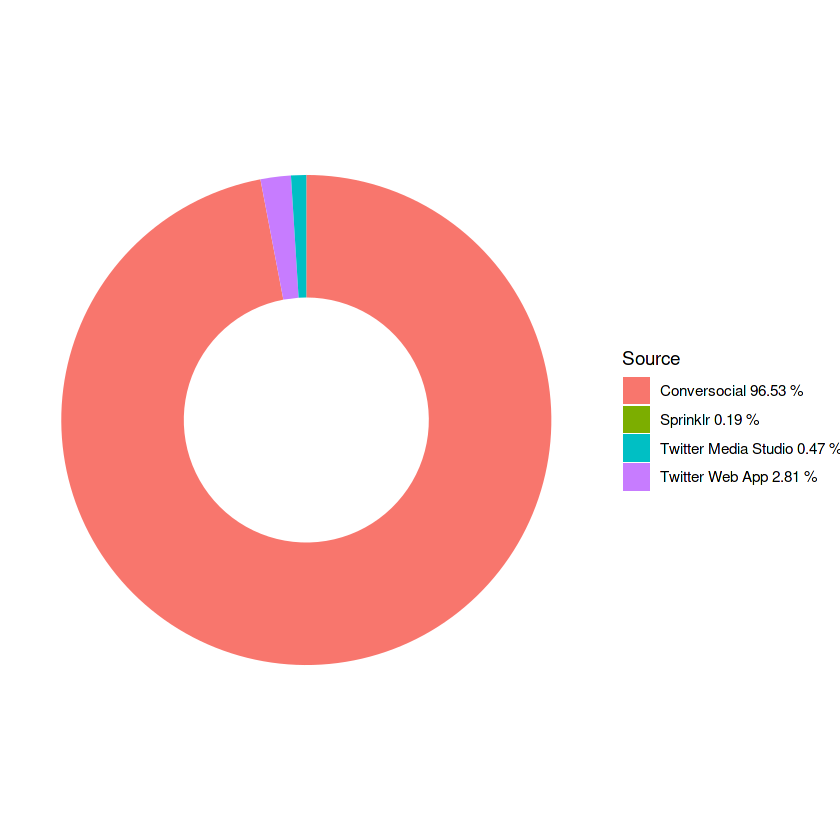

In [33]:
#Create data frame of source count per type
data_google_app <- data.frame(
  category=google_app$source,
  count=google_app$count
)

#Create statical value and plot the data
data_google_app$fraction = data_google_app$count / sum(data_google_app$count)
data_google_app$percentage = data_google_app$count / sum(data_google_app$count) * 100
data_google_app$ymax = cumsum(data_google_app$fraction)
data_google_app$ymin = c(0, head(data_google_app$ymax, n=-1))
data_google_app[,-1] <- round(data_google_app[,-1], 2)
Source <- paste(data_google_app$category, data_google_app$percentage, "%")
ggplot(data_google_app, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Source)) +
  geom_rect() +
  coord_polar(theta="y") + 
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "right")

###### Timing of tweets

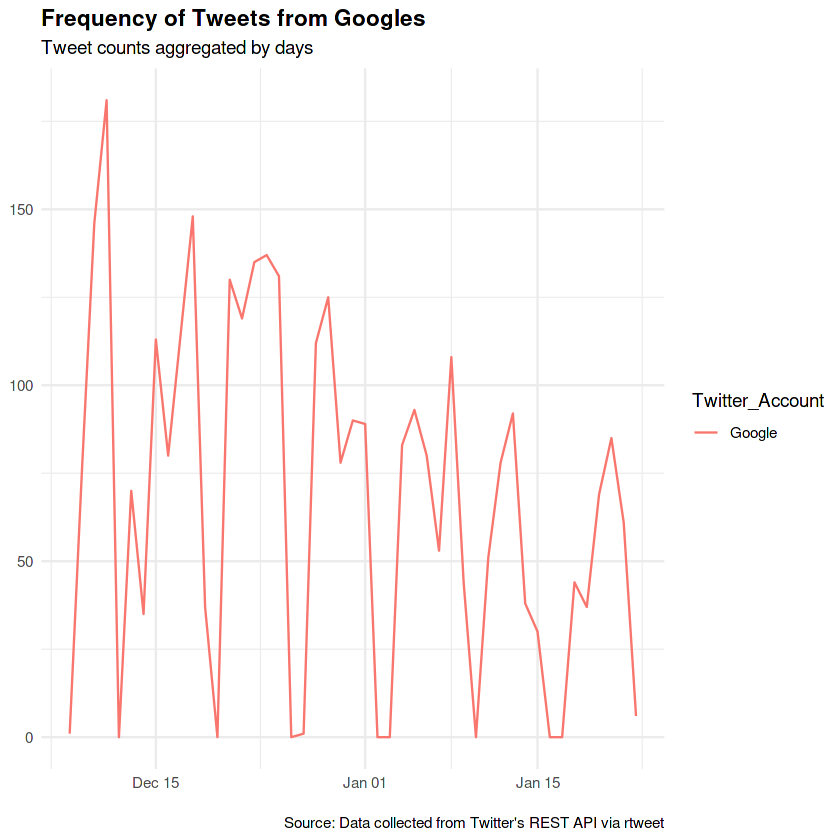

In [34]:
#Show when the tweets are published

colnames(google_timeline)[colnames(google_timeline)=="screen_name"] <- "Twitter_Account"
ts_plot(dplyr::group_by(google_timeline, Twitter_Account), "day") +
  ggplot2::theme_minimal() +
  ggplot2::theme(plot.title = ggplot2::element_text(face = "bold")) +
  ggplot2::labs(
    x = NULL, y = NULL,
    title = "Frequency of Tweets from Googles",
    subtitle = "Tweet counts aggregated by days",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet"
  )

### Sentiment analysis of Tweets of Google:

In [35]:
#Sentiment analysis
google_timelineSentiment <- inner_join(google_timeline_tokenized,get_sentiments("bing"))

head(google_timelineSentiment)
nrow(google_timelineSentiment)

Joining, by = "word"



status_id,word,n,sentiment
<chr>,<chr>,<int>,<chr>
x1336524420567986179,suspect,1,negative
x1336533336861372417,well,1,positive
x1336537289502154752,like,1,positive
x1336542715069206529,best,1,positive
x1336550684410441728,secure,1,positive
x1336588697807056896,glad,1,positive


[1] 1900

In [36]:
#Get the most negative and positive words

google_Sentiment_summary <- google_timelineSentiment %>%  count(word,sentiment,sort=TRUE) %>%
                    group_by(sentiment) %>%
                    top_n(10) %>%  
                    arrange(n) %>%
                    as.data.frame(stringsAsFactors=FALSE)

head(google_Sentiment_summary)

Selecting by n



,word,sentiment,n
,<chr>,<chr>,<int>
1,clueless,negative,2
2,disruption,negative,2
3,emergency,negative,2
4,expire,negative,2
5,harsh,negative,2
6,inconvenience,negative,2


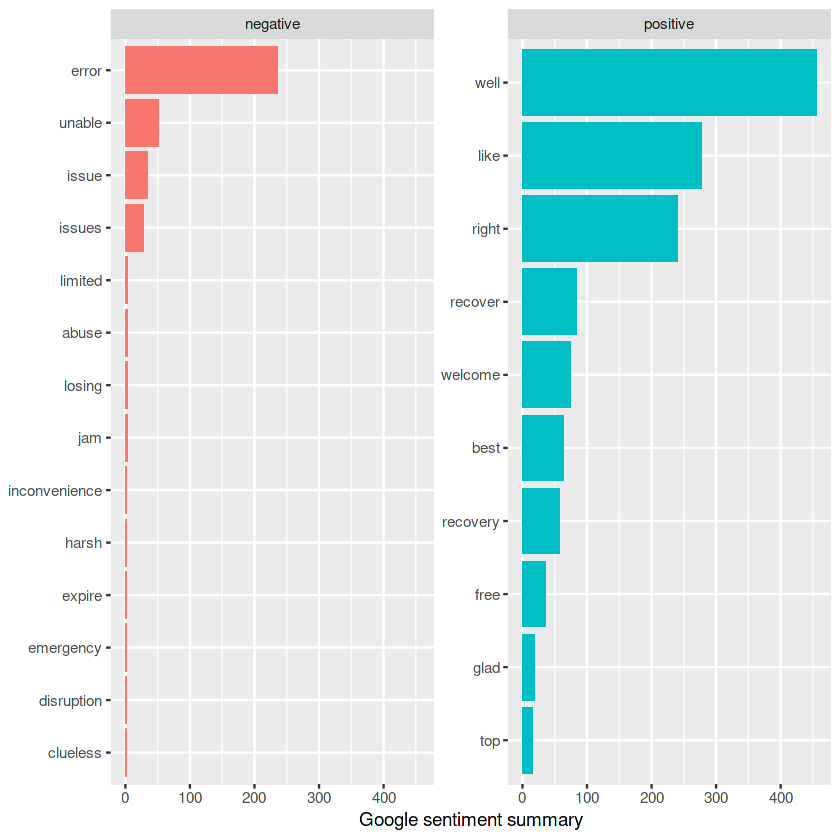

In [37]:
google_Sentiment_summary %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Google sentiment summary",
       x = NULL) +
  coord_flip()

#####  Content Analysis:

In [72]:
# create topic model:
google_timeline_lda <- LDA(google_timeline_DTM, k = 3,method="gibbs",control = list(nstart = 5, burnin = 2000, best = TRUE, seed = 2:6) )

In [73]:
# look at model structure:
str(google_timeline_lda)

Formal class 'LDA_Gibbs' [package "topicmodels"] with 16 slots
  ..@ seedwords      : NULL
  ..@ z              : int [1:50041] 3 3 3 2 2 3 1 3 3 3 ...
  ..@ alpha          : num 16.7
  ..@ call           : language LDA(x = google_timeline_DTM, k = 3, method = "gibbs", control = list(nstart = 5,      burnin = 2000, best = TRUE, seed = 2:6))
  ..@ Dim            : int [1:2] 3200 4891
  ..@ control        :Formal class 'LDA_Gibbscontrol' [package "topicmodels"] with 14 slots
  .. .. ..@ delta        : num 0.1
  .. .. ..@ iter         : int 4000
  .. .. ..@ thin         : int 2000
  .. .. ..@ burnin       : int 2000
  .. .. ..@ initialize   : chr "random"
  .. .. ..@ alpha        : num 16.7
  .. .. ..@ seed         : int [1:5] 2 3 4 5 6
  .. .. ..@ verbose      : int 0
  .. .. ..@ prefix       : chr "/tmp/RtmplKSke4/file18534339f628"
  .. .. ..@ save         : int 0
  .. .. ..@ nstart       : int 5
  .. .. ..@ best         : logi TRUE
  .. .. ..@ keep         : int 0
  .. .. ..@ estimate.

In [75]:
# terms per topic
google_tweet_topics <- tidy(google_timeline_lda, matrix = "beta")
head(google_tweet_topics)

topic,term,beta
<int>,<chr>,<dbl>
1,can,5.713274e-06
2,can,6.171278e-06
3,can,8.853947e-02
1,dm,5.713274e-06
2,dm,6.171278e-06
3,dm,7.084394e-02


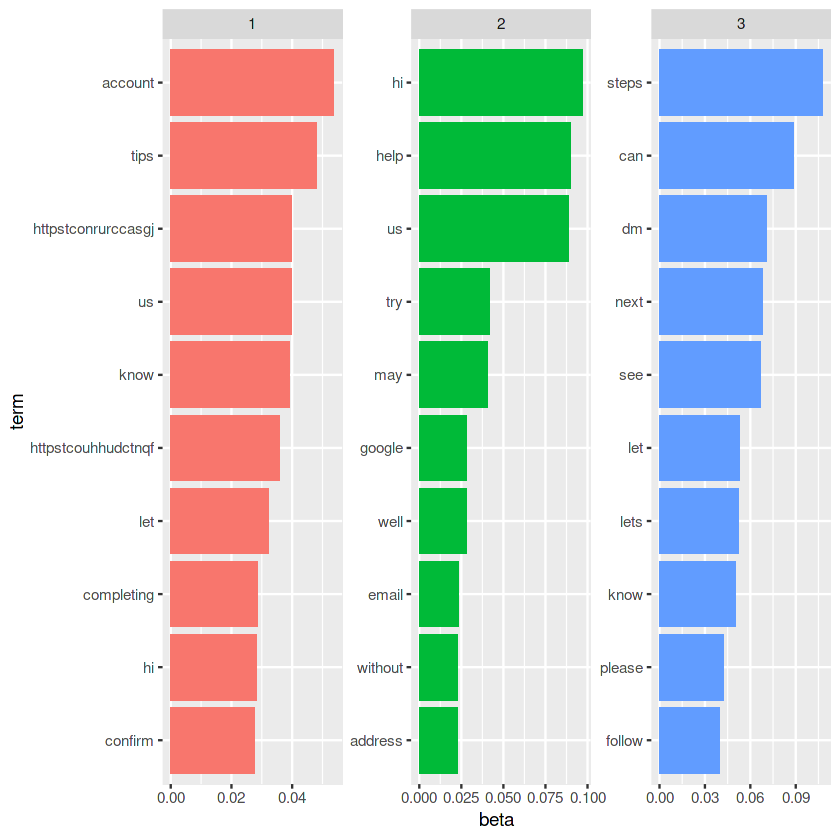

In [77]:
# visualize this

# you can use the following code to get the top terms per topic
google_top_tweet_terms <- google_tweet_topics %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)


google_top_tweet_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip() +
  scale_x_reordered()

In [79]:
google_tweet_documents <- tidy(google_timeline_lda, matrix = "gamma")
# Choose, per tweet, the most important topic (the one with the highest weight)
google_tweet_doc_topic <- google_tweet_documents %>%
  group_by(document) %>%
  arrange(desc(gamma)) %>%
  slice(1) 

 google_tweet_doc_topic%>%
  group_by(topic) %>% 
  summarise(nbr_documents = n())

,topic,nbr_documents
,<int>,<int>
1,1,1339
2,2,599
3,3,1262
